<a href="https://colab.research.google.com/github/annefrancine/ML_2022-2023/blob/main/Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

je vais travailler sur une base de donnée qui porte sur le classement de Shangai des Universités mondiales. La base de donnée a été librement distribuée par l'Organisme du classement et je l'ai eu grâce à la plateforme Kaggle.

https://www.kaggle.com/mylesoneill/world-university-rankings



* world_rank : classement mondial de l'Université
* institution Nom de l'Université
* country : Le pays dans lequel se trouve l'Université
* national_rank: classement de l'Université au niveau national
* quality_of_education: rang en fonction de la qualité de l'éducation
* alumni_employment: Rang de l'Université en fonction de ses anciens étudiants
* quality_of_faculty: Rang en fonction de la qualité de la Faculté
* publications: Rang en fonction des publications (plus l'Université publie, mieux elle est classée)
* influence: Rang en fonction de l'influence
* citations: Nombre des étudiants à l'Université
* broad_impact: Impact général (only available for 2014 and 2015)
* patents rank for patents : rang pour les brevets
* score score total, utilisé pour déterminer le classement
* year: année du classement (2012 à 2015)

In [ ]:
# Nous commençons par importer les libraries que nous utiliserons tout au long de cette analyse
import pandas as pd # librairie pour lecture et manipulation de donnée
import numpy as np # notre fameuse numpy pour le calcul numérique
import matplotlib.pyplot as plt # pour les visualisation

## **Lecture de la base de donnée**

In [ ]:
# charger un fichier depouis la mémoire de votre ordinateur sur google colab
from google.colab import files
files.upload()

Saving cwurData.csv to cwurData (1).csv


{'cwurData (1).csv': b'world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year\n1,"Harvard University",USA,1,7,9,1,1,1,1,,5,100,2012\n2,"Massachusetts Institute of Technology",USA,2,9,17,3,12,4,4,,1,91.67,2012\n3,"Stanford University",USA,3,17,11,5,4,2,2,,15,89.5,2012\n4,"University of Cambridge",United Kingdom,1,10,24,4,16,16,11,,50,86.17,2012\n5,"California Institute of Technology",USA,4,2,29,7,37,22,22,,18,85.21,2012\n6,"Princeton University",USA,5,8,14,2,53,33,26,,101,82.5,2012\n7,"University of Oxford",United Kingdom,2,13,28,9,15,13,19,,26,82.34,2012\n8,"Yale University",USA,6,14,31,12,14,6,15,,66,79.14,2012\n9,"Columbia University",USA,7,23,21,10,13,12,14,,5,78.86,2012\n10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,,16,78.55,2012\n11,"University of Chicago",USA,9,15,26,8,34,20,28,,101,73.82,2012\n12,"Cornell University",USA,10,21,42,14,22,21,16,,10,73.69,2

In [ ]:
classement = pd.read_csv("cwurData.csv")

La base vient d'être lue en utilisant la librairie Pandas. Comme à mon habitude j'aime bien rapidement regarder les premmières lignes d'une base de donnée pour me faire une représentation visuelle quand je travaillerai sur elle

https://pandas.pydata.org/docs/

In [ ]:
# afficher les 5 premières lignes
classement.head()
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [ ]:
classement.shape

(2200, 14)

La base de donné contient donc 2200 observations et 14 variables. La lecture des premières lignes de la base de donnée nous donne une indication que ces classents se sont faits sur plusieurs années, donc il est probable que certaines universités reviennent plusieurs fois.
Nous allons dans la suite de ce projet détermine quelles sont les uniques occurences des universités et combien d'universités au total nous avons dans la base.



In [ ]:
classement = classement.set_index("world_rank")

On peut maintenant se demander s'il y a des données manquantes dans ce classement? Et si oui, où sont-elles localisées? La librairie Pandas nous offre des outils très utiles pour répondre à cette question et permet même de corriger les données manquantes grâce à des algorithmes puissants.

In [ ]:
classement.isna().sum()

institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

Cette commande nous montre que la plupart des variables de la base de donnée ne contient pas de données manquantes, seule la variable broad_impact en contient, et 200 précisément!

Les clarifications nous indiquent la variable broad_impact n'est disponible que pour les années 2014 et 2015, donc on peut la garder dans notre base et l'explorer plus tard.

A partir d'ici on peut se demander combien d'uniques universités il y a dans la base puisque la base de donnée classe les universités sur 3 ans.

In [ ]:
classement["institution"].nunique()

1024

Pour répondre à la question précédente, nous avons donc 1024 différentes universités dans ce classement.
Combien de pays avons nous dans la base?

In [ ]:
classement["country"].nunique()

59

Comme on peut le voir, tous les pays du monde ne sont pas représentés, toutes les 1024 Universités de ce classement appartiennent uniquement à ces seuls pays. On peut maintenant se demander quels sont les pays qui ont les plus d'universités dans le classement.

Affichons les 6 premiers et les 6 derniers

In [ ]:
classement["country"].value_counts().head(6)

USA               573
China             167
Japan             159
United Kingdom    144
Germany           115
France            109
Name: country, dtype: int64

Les USA, à eux seuls comptent 573 universités soit plus de la moitié des Universités présentes dans le classement. La France figure parmi les premiers avec 109 universités !

In [ ]:
classement["country"].value_counts().tail(6)

Lithuania               2
Uganda                  2
United Arab Emirates    2
Uruguay                 2
Cyprus                  2
Puerto Rico             2
Name: country, dtype: int64

On peut aussi voir la distribution de ces universités graphiquement pour avoir une idée plus claire.

In [ ]:
plt.style.use('fivethirtyeight') # Thème

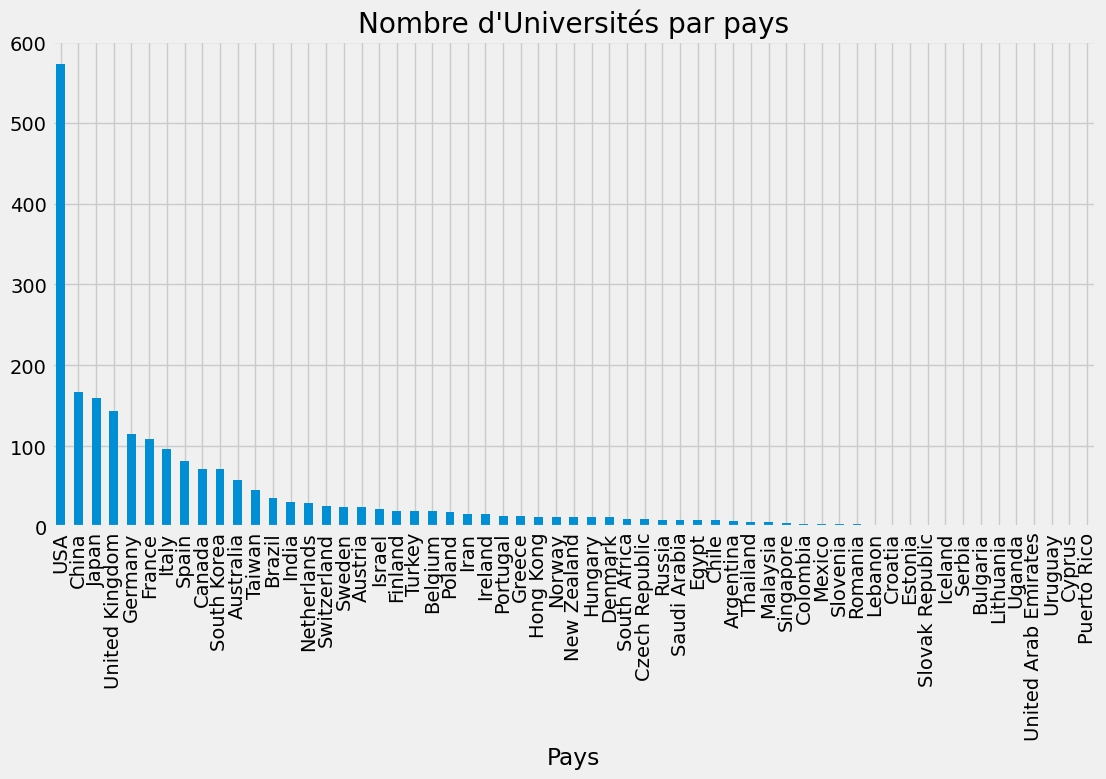

In [ ]:
plt.figure(figsize = (12,6), dpi= 100) # Pour gérer la taille de la figure
classement["country"].value_counts().plot(kind = "bar")
plt.title("Nombre d'Universités par pays")
plt.xlabel("Pays")
plt.show()

Intéressons-nous maintenant à la distibution des scores. Les scores vont de 0 à 100

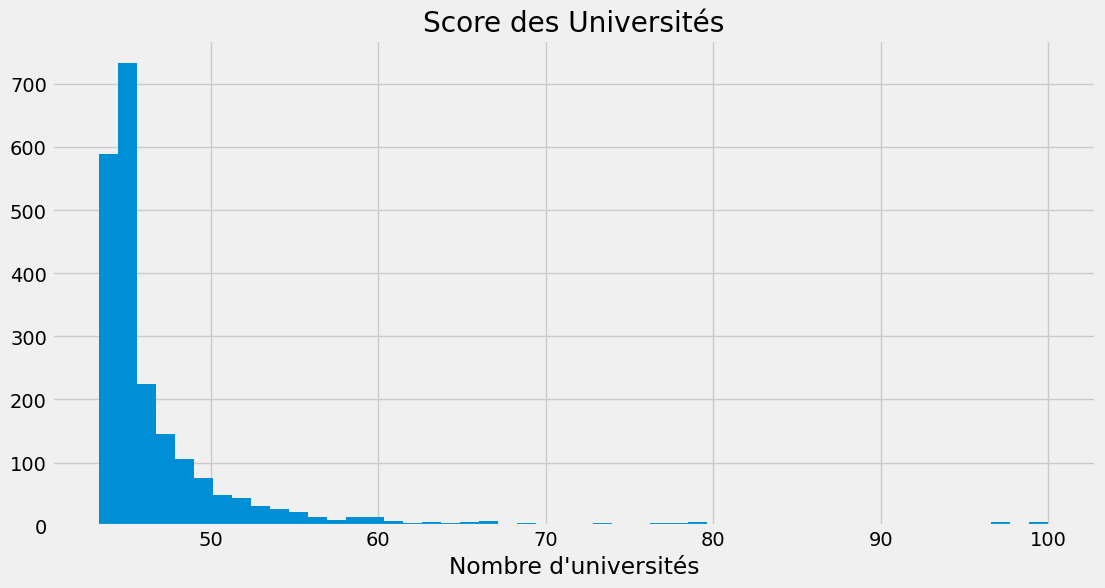

In [ ]:
plt.figure(figsize = (12,6), dpi= 100) # Pour gérer la taille de la figure
classement["score"].hist(bins = 50)
plt.title("Score des Universités")
plt.xlabel("Nombre d'universités")
plt.show()

Une très grande partie des universités a un score compris entre 25 et 50. Qu'est-ce qui peut expliquer cela? Et quelles sont les universités ayant les meilleurs scores?

Rappellons-nous que les classements sont faits durant 3 années consécutives, donc il se peut qu'une université change de rang pendant ces années. C'est ce que nous allons essayer de voir

On peut se demander ici, combiens de classement il y a eu par année !

In [ ]:
classement["year"].value_counts()

2014    1000
2015    1000
2012     100
2013     100
Name: year, dtype: int64

On observe que clairement, les années diffèrent. En 2012 et 2013 seules 100 universités ont été classées. C'est à partir de 2014 que le classement s'est élargi à un plus grand nombre d'universités, 9 fois plus. Pourquoi cela?

# **Saut**

Comme nous l'avons remarqué plus haut, le classement se fait sur 4 années consécutives, il serait donc utile de compter le nombre d'uniques occurences sur ces 4 années.

In [ ]:
for cols, title in enumerate(classement.columns):
    print(f" Il y a {classement[title].nunique()} valeurs uniques dans, {title}")

 Il y a 1024 valeurs uniques dans, institution
 Il y a 59 valeurs uniques dans, country
 Il y a 229 valeurs uniques dans, national_rank
 Il y a 367 valeurs uniques dans, quality_of_education
 Il y a 565 valeurs uniques dans, alumni_employment
 Il y a 199 valeurs uniques dans, quality_of_faculty
 Il y a 987 valeurs uniques dans, publications
 Il y a 944 valeurs uniques dans, influence
 Il y a 135 valeurs uniques dans, citations
 Il y a 343 valeurs uniques dans, broad_impact
 Il y a 738 valeurs uniques dans, patents
 Il y a 764 valeurs uniques dans, score
 Il y a 4 valeurs uniques dans, year


In [ ]:
series = pd.Series([],dtype=pd.StringDtype())
for cols, title in enumerate(classement.columns):
    series[title] = classement[title].nunique()

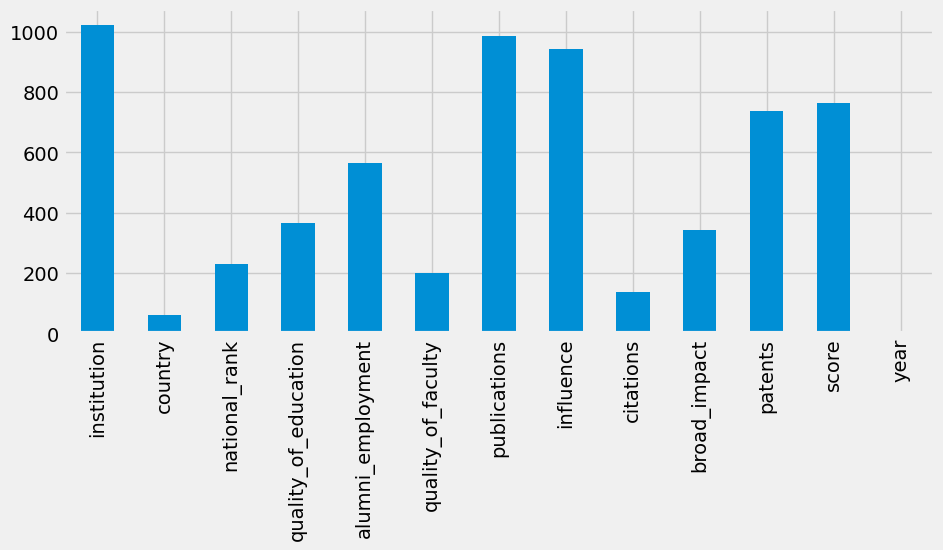

In [ ]:
plt.figure(figsize = (10,4), dpi= 100) # Pour gérer la taille de la figure
series.plot(kind = "bar", );

## **Que nous revèlent ces valeurs uniques?**

Nous avons un total de 1024 universités dans la base de donné. Le classement mondial va de 1 à 1000. On peut donc déduire qu'il y a des universités qui sont classées plusieurs fois, durant les 4 années successives et également qu'il y a en même temps certaines universités qui sont sorties du classement pendant que d'autres entrent dans le classement, c'est ce qui explique le différentiel 1024 universités et 1000 classements. Même constat pour les variables publications et influence qui avoisinent les 1000 valeurs uniques.

La question qu'on se pose maintenant est de comprendre comment se fait-il qu'il y a si peu de valeurs uniques dans les autres variables servant de classement? Y'aurait-il des chevauchements, où y'aurait-il des universités ex-aequo sur certains classements?

Pour répondre à cette question, nous allons voir dans un tableau année par année la variation des uniques occurences.

In [ ]:
series = pd.Series([],dtype=pd.StringDtype())
unique = pd.DataFrame()
years = list(classement["year"].unique())

for year in years:
    mask = classement.loc[:,"year"] == year
    df = classement[mask]
    for cols, title in enumerate(df.columns):
        series[title] = df[title].nunique()
    unique = unique.append(series, ignore_index = True)

<ipython-input-22-2e57f4825c5b>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique = unique.append(series, ignore_index = True)
<ipython-input-22-2e57f4825c5b>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique = unique.append(series, ignore_index = True)
<ipython-input-22-2e57f4825c5b>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique = unique.append(series, ignore_index = True)
<ipython-input-22-2e57f4825c5b>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique = unique.append(series, ignore_index = True)


In [ ]:
unique

,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,100,16,58,67,50,78,80,81,81,0,51,99,1
1,100,18,57,58,42,79,79,76,83,0,41,96,1
2,1000,59,229,354,473,176,919,899,63,215,71,435,1
3,1000,59,229,367,564,176,924,915,61,211,736,416,1


Dans ce tableau, nous avons les valeurs uniques année par année de toutes les colonnes de notre base de donnée.
Les deux premières lignes représentent les années 2012 et 2013, pour ces années on observe que les valeurs uniques sont faibles car le classement s'effectuait sur un total de 100 pays seulement. Nous allons nous intéresser uniquement aux colonnes significatives : en 2012 il y a eu le classement en fonction des publication comptait 80 classements, ce nombre a baissé à 79 en 2013.
Les deux autres colonnes représentent les années 2014 et 2015, là aussi on voit les évolutions des valeurs uniques.

## **Les Universités françaises**
On peut maintenant s'intéresser aux Universités françaises, pour voir leurs caractéristiques.

In [ ]:
france = classement["country"] == "France"
univ_france = classement[france]

In [ ]:
univ_france.head()

,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,,,,,,,,,,,,,
48,University of Paris-Sud,France,1,48,101,25,73,96,101,NaN,101,50.44,2012
54,École normale supérieure - Paris,France,2,3,61,77,101,101,101,NaN,101,49.10,2012
61,École Polytechnique,France,3,47,3,101,101,101,101,NaN,101,48.33,2012
63,Pierre-and-Marie-Curie University,France,4,54,101,84,36,53,78,NaN,101,48.26,2012
100,Mines ParisTech,France,5,44,4,101,101,101,101,NaN,101,43.36,2012


## **Score des Universités françaises**

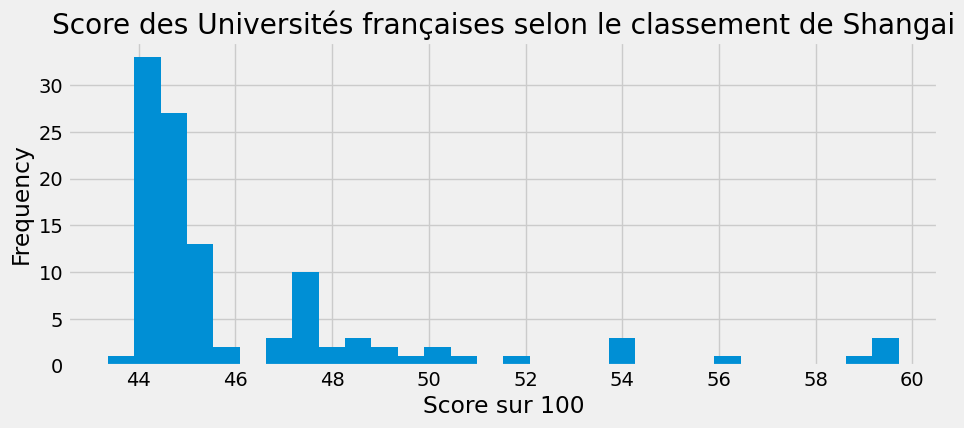

In [ ]:
plt.figure(figsize = (10,4), dpi= 100) # Pour gérer la taille de la figure
univ_france["score"].plot.hist(bins = 30)
plt.title("Score des Universités françaises selon le classement de Shangai")
plt.xlabel("Score sur 100")
plt.show()

On observe que les scores des Universités françaises se situent dans l'intervalle [40, 60]. Toutefois la plupart d'entre elles ont un score inférieur à 50.
Quelles sont les universités 5 premières et dernières universités françaises selon ce classement? On ne s'intéresse qu'à l'année 2015

In [ ]:
univ_france = univ_france

In [ ]:
univ_france[univ_france["year"] == 2015][["institution", "national_rank", "score"]].nlargest(5, "score")

,institution,national_rank,score
world_rank,,,
36,École Polytechnique,1,59.20
37,École normale supérieure - Paris,2,58.80
58,University of Paris-Sud,3,54.21
63,Pierre-and-Marie-Curie University,4,53.79
104,Mines ParisTech,5,50.34


La première Université française est classée 36e sur le rang mondial tandis que l'Université française dernière du classement national se positionne à la 989e place mondiale selon le classement Shangaï en 2015.
C'est quoi les contrastes?